In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

file = "Net_generation_for_electric_power_by_year.csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Feb 04 2021 20:30:08 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Net generation for electric power,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii : utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [2]:
energy_df=df.drop([0, 1, 2, 4])

In [3]:
energy_df[['Net generation for electric power', 'Energy Source']] = energy_df['Net generation for electric power'].str.split(':', expand=True)
energy_df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Energy Source
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [4]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [5]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df


3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [6]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [7]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [8]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [9]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' utility-scale photovoltaic',
       ' utility-scale thermal', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [10]:
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [11]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

In [13]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [14]:
#Removing rows where all of the data is blank.
filtered_df2=filtered_df[((filtered_df['2001']!="--")&(filtered_df['2002']!="--")&
                         (filtered_df['2003']!="--")&(filtered_df['2004']!="--")&
                         (filtered_df['2005']!="--")&(filtered_df['2006']!="--")&
                         (filtered_df['2007']!="--")&(filtered_df['2008']!="--")&
                         (filtered_df['2009']!="--")&(filtered_df['2010']!="--")&
                         (filtered_df['2011']!="--")&(filtered_df['2012']!="--")&
                         (filtered_df['2013']!="--")&(filtered_df['2014']!="--")&
                         (filtered_df['2015']!="--")&(filtered_df['2016']!="--")&
                         (filtered_df['2017']!="--")&(filtered_df['2018']!="--")&
                         (filtered_df['2019']!="--"))]

filtered_df2

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [15]:
#create a dataframe for the East North Central region
ENC_df1=filtered_df2.loc[filtered_df2["Location"]=="East North Central"]
ENC_df1=ENC_df1.drop(columns=["source key", "units", "Location"])

ENC_df1=ENC_df1.set_index(["Renewable", "Energy_Source"]).sort_index()
ENC_df1

3                                               2001    2002    2003    2004  \
Renewable     Energy_Source                                                    
non-renewable  coal                           424791  439095  445150  449108   
               natural gas                     20992   30578   20720   22318   
               nuclear                        146040  145261  143377  150447   
               other                             341     660     477     379   
               other gases                       129     171     136     830   
               petroleum coke                    258     443     366    1816   
               petroleum liquids                2923    1894    2656    1957   
               wood and wood-derived fuels      1165    1064    1130    1250   
renewable      biomass                          2821    2753    2877    2899   
               conventional hydroelectric       4658    4966    4037    4617   
               hydro-electric pumped storage   -1127   -1036   -1017   -1113   
               other biomass                    1656    1688    1747    1649   
               other renewables                 2894    2799    2995    3083   
               wind                               73      47     118     184   
NaN           NaN                                NaN     NaN     NaN     NaN   

3                                               2005    2006    2007    2008  \
Renewable     Energy_Source                                                    
non-renewable  coal                           459078  451510  456905  456001   
               natural gas                     31749   25712   33643   23552   
               nuclear                        150858  152301  155920  156305   
               other                             293     261     248     257   
               other gases                       563     499     464     383   
               petroleum coke                   1654    1643    1541    1719   
               petroleum liquids                1620     927    1144     926   
               wood and wood-derived fuels      1250    1269    1239    1238   
renewable      biomass                          2723    3012    3021    3399   
               conventional hydroelectric       4046    4258    3594    3753   
               hydro-electric pumped storage   -1106   -1039   -1129    -916   
               other biomass                    1473    1743    1783    2161   
               other renewables                 2972    3384    3812    6618   
               wind                              249     373     791    3219   
NaN           NaN                                NaN     NaN     NaN     NaN   

3                                               2009    2010    2011    2012  \
Renewable     Energy_Source                                                    
non-renewable  coal                           412245  425653  394593  341389   
               natural gas                     25139   35231   45414   79181   
               nuclear                        145214  154900  155162  155808   
               other                             249     228     296     280   
               other gases                       219     405     386     673   
               petroleum coke                   1486    1595    2632    1980   
               petroleum liquids                 732     752     760     606   
               wood and wood-derived fuels      1111    1286    1459    1429   
renewable      biomass                          3409    3567    3876    3938   
               conventional hydroelectric       3796    4200    4254    3549   
               hydro-electric pumped storage    -857   -1023    -945    -773   
               other biomass                    2298    2281    2417    2510   
               other renewables                 8998   12441   15244   18604   
               wind                             5589    8847   11338   14598  

In [16]:
#refine the ENC dataframe so the annual data are the data rows
ENC_df1=ENC_df1.dropna()
ENC_df1=ENC_df1.astype(int)
ENC_df1=ENC_df1.T
ENC_df1

Renewable     non-renewable                                            \
Energy_Source          coal  natural gas  nuclear  other  other gases   
3                                                                       
2001                 424791        20992   146040    341          129   
2002                 439095        30578   145261    660          171   
2003                 445150        20720   143377    477          136   
2004                 449108        22318   150447    379          830   
2005                 459078        31749   150858    293          563   
2006                 451510        25712   152301    261          499   
2007                 456905        33643   155920    248          464   
2008                 456001        23552   156305    257          383   
2009                 412245        25139   145214    249          219   
2010                 425653        35231   154900    228          405   
2011                 394593        45414   155162    296          386   
2012                 341389        79181   155808    280          673   
2013                 368854        55362   153849    277         1724   
2014                 361841        56666   154835    229         1872   
2015                 310998        85612   154001    203         1983   
2016                 272319       107853   157128     84         2183   
2017                 274501        97032   156909     96         2275   
2018                 269192       131169   157024    104         2228   
2019                 218059       153887   158686     90         2327   

Renewable                                                                      \
Energy_Source  petroleum coke  petroleum liquids  wood and wood-derived fuels   
3                                                                               
2001                      258               2923                         1165   
2002                      443               1894                         1064   
2003                      366               2656                         1130   
2004                     1816               1957                         1250   
2005                     1654               1620                         1250   
2006                     1643                927                         1269   
2007                     1541               1144                         1239   
2008                     1719                926                         1238   
2009                     1486                732                         1111   
2010                     1595                752                         1286   
2011                     2632                760                         1459   
2012                     1980                606                         1429   
2013                     2902                581                         1476   
2014                     2974                721                         1546   
2015                     2908                541                         1257   
2016                     2090                523                         1162   
2017                     2002                499                         1235   
2018                     2172                525                         1258   
2019                     1439                466                         1153   

Renewable     renewable                              \
Energy_Source   biomass  conventional hydroelectric   
3                                                     
2001               2821                        4658   
2002               2753                        4966   
2003               2877                        4037   
2004               2899                        4617   
2005               2723                        4046   
2006               3012                        4258   
2007               3021                        3594   
2008               3399                        3753   
2009 

In [17]:
#create a summary table for ENC energy production by source
ENC_sum=ENC_df1.agg(["mean", "std", "min", "max"])

ENC_quant=ENC_df1.quantile([.25, .5, .75])
ENC_sum=ENC_sum.append(ENC_quant)
ENC_sum

non-renewable                                                         \
               coal    natural gas        nuclear       other  other gases   
mean  380593.789474   56937.368421  152843.421053  265.894737  1023.684211   
std    77760.754904   40693.965690    4679.973852  138.812781   860.018156   
min   218059.000000   20720.000000  143377.000000   84.000000   129.000000   
max   459078.000000  153887.000000  158686.000000  660.000000  2327.000000   
0.25  326193.500000   25425.500000  150652.500000  215.500000   384.500000   
0.5   412245.000000   35231.000000  154835.000000  257.000000   563.000000   
0.75  447129.000000   82396.500000  156112.500000  294.500000  1927.500000   

                                                                      \
      petroleum coke  petroleum liquids  wood and wood-derived fuels   
mean     1769.473684        1092.263158                  1261.947368   
std       797.806881         753.108804                   130.523933   
min       258.000000         466.000000                  1064.000000   
max      2974.000000        2923.000000                  1546.000000   
0.25     1513.500000         561.000000                  1163.500000   
0.5      1719.000000         752.000000                  1250.000000   
0.75     2131.000000        1382.000000                  1277.500000   

        renewable                                                             \
          biomass  conventional hydroelectric  hydro-electric pumped storage   
mean  3457.684211                 4363.210526                    -892.368421   
std    506.185742                  491.353525                     189.811957   
min   2723.000000                 3549.000000                   -1129.000000   
max   4204.000000                 5216.000000                    -481.000000   
0.25  2955.500000                 4041.500000                   -1037.500000   
0.5   3567.000000                 4268.000000                    -916.000000   
0.75  3879.000000                 4752.000000                    -726.500000   

                                                     
      other biomass  other renewables          wind  
mean    2195.789474      14769.263158  11159.736842  
std      433.246476      11569.739356  10941.891665  
min     1473.000000       2799.000000     47.000000  
max     2686.000000      34668.000000  30313.000000  
0.25    1745.000000       3233.500000    311.000000  
0.5     2298.000000      12441.000000   8847.000000  
0.75    2570.500000      25785.500000  21487.500000

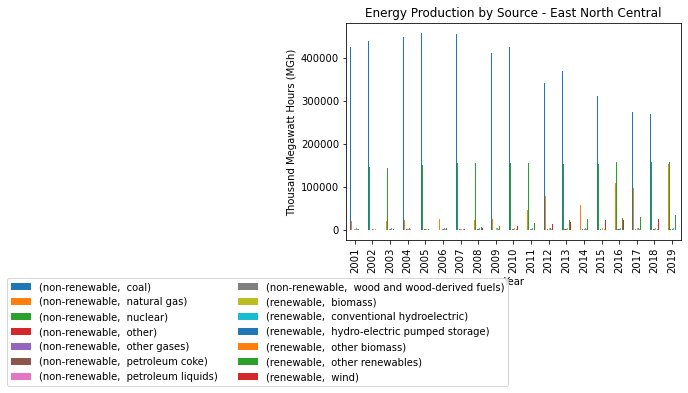

In [18]:
#create a plot showing energy production in the region over time
ENC_df1.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - East North Central")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [19]:
#create a dataframe for change in energy production for ENC
ENC_delta=ENC_df1.diff(axis=0)
ENC_delta=ENC_delta.drop("2001")
ENC_delta

Renewable     non-renewable                                            \
Energy_Source          coal  natural gas  nuclear  other  other gases   
3                                                                       
2002                14304.0       9586.0   -779.0  319.0         42.0   
2003                 6055.0      -9858.0  -1884.0 -183.0        -35.0   
2004                 3958.0       1598.0   7070.0  -98.0        694.0   
2005                 9970.0       9431.0    411.0  -86.0       -267.0   
2006                -7568.0      -6037.0   1443.0  -32.0        -64.0   
2007                 5395.0       7931.0   3619.0  -13.0        -35.0   
2008                 -904.0     -10091.0    385.0    9.0        -81.0   
2009               -43756.0       1587.0 -11091.0   -8.0       -164.0   
2010                13408.0      10092.0   9686.0  -21.0        186.0   
2011               -31060.0      10183.0    262.0   68.0        -19.0   
2012               -53204.0      33767.0    646.0  -16.0        287.0   
2013                27465.0     -23819.0  -1959.0   -3.0       1051.0   
2014                -7013.0       1304.0    986.0  -48.0        148.0   
2015               -50843.0      28946.0   -834.0  -26.0        111.0   
2016               -38679.0      22241.0   3127.0 -119.0        200.0   
2017                 2182.0     -10821.0   -219.0   12.0         92.0   
2018                -5309.0      34137.0    115.0    8.0        -47.0   
2019               -51133.0      22718.0   1662.0  -14.0         99.0   

Renewable                                                                      \
Energy_Source  petroleum coke  petroleum liquids  wood and wood-derived fuels   
3                                                                               
2002                    185.0            -1029.0                       -101.0   
2003                    -77.0              762.0                         66.0   
2004                   1450.0             -699.0                        120.0   
2005                   -162.0             -337.0                          0.0   
2006                    -11.0             -693.0                         19.0   
2007                   -102.0              217.0                        -30.0   
2008                    178.0             -218.0                         -1.0   
2009                   -233.0             -194.0                       -127.0   
2010                    109.0               20.0                        175.0   
2011                   1037.0                8.0                        173.0   
2012                   -652.0             -154.0                        -30.0   
2013                    922.0              -25.0                         47.0   
2014                     72.0              140.0                         70.0   
2015                    -66.0             -180.0                       -289.0   
2016                   -818.0              -18.0                        -95.0   
2017                    -88.0              -24.0                         73.0   
2018                    170.0               26.0                         23.0   
2019                   -733.0              -59.0                       -105.0   

Renewable     renewable                              \
Energy_Source   biomass  conventional hydroelectric   
3                                                     
2002              -68.0                       308.0   
2003              124.0                      -929.0   
2004               22.0                       580.0   
2005             -176.0                      -571.0   
2006              289.0                       212.0   
2007                9.0                      -664.0   
2008              378.0                       159.0   
2009               10.0                        43.0   
2010              158.0                       404.0   
2011              309.0                        54.0   
2012               62.0                      -705

In [28]:
#create a summary table for changes in ENC energy production by source
ENC_delta_sum=ENC_delta.agg(["mean", "std", "min", "max"])

ENC_delta_quant=ENC_delta.quantile([.25, .5, .75])
ENC_delta_sum=ENC_delta_sum.append(ENC_delta_quant)
ENC_delta_sum

non-renewable                                                       \
              coal   natural gas       nuclear       other  other gases   
mean -11485.111111   7383.055556    702.555556  -13.944444   122.111111   
std   25998.933885  16358.048005   4173.974439  100.867690   310.873322   
min  -53204.000000 -23819.000000 -11091.000000 -183.000000  -267.000000   
max   27465.000000  34137.000000   9686.000000  319.000000  1051.000000   
0.25 -36774.250000  -4201.750000   -639.000000  -44.000000   -44.000000   
0.5   -3106.500000   8681.000000    398.000000  -15.000000    67.000000   
0.75   5890.000000  19226.500000   1607.250000    5.250000   176.500000   

                                                                      \
      petroleum coke  petroleum liquids  wood and wood-derived fuels   
mean       65.611111         -136.50000                    -0.666667   
std       584.251370          391.12466                   114.873844   
min      -818.000000        -1029.00000                  -289.000000   
max      1450.000000          762.00000                   175.000000   
0.25     -147.000000         -212.00000                   -78.750000   
0.5       -38.500000          -42.00000                     9.500000   
0.75      176.000000           17.00000                    69.000000   

       renewable                                                             \
         biomass  conventional hydroelectric  hydro-electric pumped storage   
mean   46.722222                   16.111111                      23.944444   
std   182.957985                  525.280417                     132.633272   
min  -275.000000                 -929.000000                    -271.000000   
max   378.000000                  719.000000                     220.000000   
0.25  -68.000000                 -409.750000                     -73.250000   
0.5    32.000000                  106.500000                      39.000000   
0.75  152.000000                  494.750000                      87.750000   

                                                   
      other biomass  other renewables        wind  
mean      47.388889       1765.222222  1680.00000  
std      137.671877       1582.058843  1520.63872  
min     -176.000000       -111.000000   -26.00000  
max      378.000000       4263.000000  4229.00000  
0.25     -41.500000        250.000000   130.00000  
0.5       36.000000       2046.000000  1980.50000  
0.75     125.250000       2993.500000  2723.00000

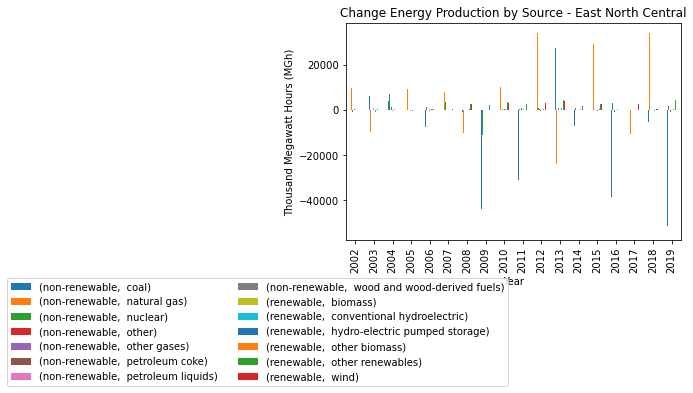

In [20]:
#create a plot showing the change in energy production by source over time for the ENC region
ENC_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - East North Central")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [21]:
#breakout out ENC dataframe to include renewable energy sources only
RE_ENC=ENC_df1.filter(like = "renewable", axis=0)
RE_ENC

Empty DataFrame
Columns: [(non-renewable,  coal), (non-renewable,  natural gas), (non-renewable,  nuclear), (non-renewable,  other), (non-renewable,  other gases), (non-renewable,  petroleum coke), (non-renewable,  petroleum liquids), (non-renewable,  wood and wood-derived fuels), (renewable,  biomass), (renewable,  conventional hydroelectric), (renewable,  hydro-electric pumped storage), (renewable,  other biomass), (renewable,  other renewables), (renewable,  wind)]
Index: []

In [22]:
#create a dataframe for the state of Michigan
MI_df=filtered_df2.loc[filtered_df2["Location"]=="Michigan"]
MI_df=MI_df.drop(columns=["source key", "units", "Location"])

MI_df=MI_df.set_index(["Renewable", "Energy_Source"]).sort_index()
MI_df

3                                              2001   2002   2003   2004  \
Renewable     Energy_Source                                                
non-renewable  coal                           67343  65649  66869  67749   
               natural gas                    12885  15387  11043  14228   
               nuclear                        26711  31087  27954  30562   
               other                            142    181    197    168   
               other gases                        6     10      2    599   
               petroleum coke                     1     35     26      8   
               petroleum liquids                733   1056    861    718   
               wood and wood-derived fuels     1103    992   1018   1105   
renewable      biomass                         1739   1610   1605   1643   
               conventional hydroelectric      1536   1640   1310   1509   
               hydro-electric pumped storage  -1127  -1036  -1017  -1113   
               other biomass                    636    618    587    537   
               other renewables                1739   1610   1608   1644   
               wind                               0      0      3      2   
NaN           NaN                               NaN    NaN    NaN    NaN   

3                                              2005   2006   2007   2008  \
Renewable     Energy_Source                                                
non-renewable  coal                           69634  67104  69944  68838   
               natural gas                    13455  11190  13009   9499   
               nuclear                        32872  29066  31517  31484   
               other                            183    170    173    183   
               other gases                      372    320    282    264   
               petroleum coke                    73     91    105     97   
               petroleum liquids                782    272    423    260   
               wood and wood-derived fuels     1064   1063   1014   1004   
renewable      biomass                         1630   1646   1570   1618   
               conventional hydroelectric      1433   1488   1244   1339   
               hydro-electric pumped storage  -1106  -1039  -1129   -916   
               other biomass                    566    583    556    614   
               other renewables                1631   1648   1573   1759   
               wind                               2      2      3    141   
NaN           NaN                               NaN    NaN    NaN    NaN   

3                                              2009   2010   2011   2012  \
Renewable     Energy_Source                                                
non-renewable  coal                           66251  65137  58501  52814   
               natural gas                     8302  12012  12554  21097   
               nuclear                        21851  29625  32889  28020   
               other                            201    187    183    183   
               other gases                      203    299    269    315   
               petroleum coke                    97     90     67     73   
               petroleum liquids                195    176    174    134   
               wood and wood-derived fuels      872    987    998    892   
renewable      biomass                         1550   1625   1665   1652   
               conventional hydroelectric      1347   1222   1328   1181   
               hydro-electric pumped storage   -857  -1023   -945   -773   
               other biomass                    678    638    667    760   
               other renewables                1851   1985   2121   2783   
               wind                             300    360    456   1132   
NaN           NaN                               NaN    NaN    NaN    NaN   

3                                              2013   2014   2015   2016  \
Renewable     Energy_Source                  

In [23]:
#refine the Michigan dataframe so the annual data are the data rows
MI_df=MI_df.dropna()
MI_df=MI_df.astype(int)
MI_df=MI_df.T
MI_df

Renewable     non-renewable                                            \
Energy_Source          coal  natural gas  nuclear  other  other gases   
3                                                                       
2001                  67343        12885    26711    142            6   
2002                  65649        15387    31087    181           10   
2003                  66869        11043    27954    197            2   
2004                  67749        14228    30562    168          599   
2005                  69634        13455    32872    183          372   
2006                  67104        11190    29066    170          320   
2007                  69944        13009    31517    173          282   
2008                  68838         9499    31484    183          264   
2009                  66251         8302    21851    201          203   
2010                  65137        12012    29625    187          299   
2011                  58501        12554    32889    183          269   
2012                  52814        21097    28020    183          315   
2013                  55951        11604    28921    153          957   
2014                  52646        11825    31246    184         1120   
2015                  52689        19216    29334    192         1213   
2016                  40433        28402    31552    142         1615   
2017                  41974        25139    32381    114         1652   
2018                  42257        29952    30479    112         1598   
2019                  37324        33226    32909     85         1697   

Renewable                                                                      \
Energy_Source  petroleum coke  petroleum liquids  wood and wood-derived fuels   
3                                                                               
2001                        1                733                         1103   
2002                       35               1056                          992   
2003                       26                861                         1018   
2004                        8                718                         1105   
2005                       73                782                         1064   
2006                       91                272                         1063   
2007                      105                423                         1014   
2008                       97                260                         1004   
2009                       97                195                          872   
2010                       90                176                          987   
2011                       67                174                          998   
2012                       73                134                          892   
2013                      268                126                          904   
2014                      748                136                          988   
2015                      571                104                          776   
2016                      556                116                          821   
2017                      856                105                          861   
2018                      984                112                          890   
2019                      673                 90                          797   

Renewable     renewable                              \
Energy_Source   biomass  conventional hydroelectric   
3                                                     
2001               1739                        1536   
2002               1610                        1640   
2003               1605                        1310   
2004               1643                        1509   
2005               1630                        1433   
2006               1646                        1488   
2007               1570                        1244   
2008               1618                        1339   
2009 

In [24]:
#create a summary table for Michigan energy production by source
MI_sum=MI_df.agg(["mean", "std", "min", "max"])

MI_quant=MI_df.quantile([.25, .5, .75])
MI_sum=MI_sum.append(MI_quant)
MI_sum

non-renewable                                                        \
               coal   natural gas        nuclear       other  other gases   
mean   58374.052632  16527.631579   30024.210526  164.894737   673.315789   
std    11163.431788   7461.618838    2675.585555   32.107276   616.881589   
min    37324.000000   8302.000000   21851.000000   85.000000     2.000000   
max    69944.000000  33226.000000   32909.000000  201.000000  1697.000000   
0.25  326193.500000  25425.500000  150652.500000  215.500000   384.500000   
0.5   412245.000000  35231.000000  154835.000000  257.000000   563.000000   
0.75  447129.000000  82396.500000  156112.500000  294.500000  1927.500000   

                                                                      \
      petroleum coke  petroleum liquids  wood and wood-derived fuels   
mean      285.210526         345.947368                   955.210526   
std       328.143529         314.018838                   101.272777   
min         1.000000          90.000000                   776.000000   
max       984.000000        1056.000000                  1105.000000   
0.25     1513.500000         561.000000                  1163.500000   
0.5      1719.000000         752.000000                  1250.000000   
0.75     2131.000000        1382.000000                  1277.500000   

        renewable                                                             \
          biomass  conventional hydroelectric  hydro-electric pumped storage   
mean  1657.421053                 1441.842105                    -892.368421   
std     70.522901                  146.466630                     189.811957   
min   1550.000000                 1181.000000                   -1129.000000   
max   1852.000000                 1650.000000                    -481.000000   
0.25  2955.500000                 4041.500000                   -1037.500000   
0.5   3567.000000                 4268.000000                    -916.000000   
0.75  3879.000000                 4752.000000                    -726.500000   

                                                     
      other biomass  other renewables          wind  
mean     702.157895       3518.842105   1844.000000  
std      120.961547       2366.238395   2305.249348  
min      537.000000       1573.000000      0.000000  
max      864.000000       7623.000000   5826.000000  
0.25    1745.000000       3233.500000    311.000000  
0.5     2298.000000      12441.000000   8847.000000  
0.75    2570.500000      25785.500000  21487.500000

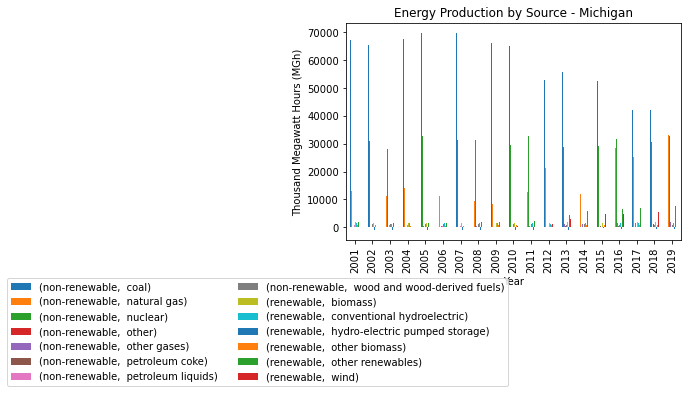

In [25]:
#create a plot showing energy production in the state over time
MI_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Michigan")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [26]:
#create a dataframe for change in energy production for Michigan
MI_delta=MI_df.diff(axis=0)
MI_delta=MI_delta.drop("2001")
MI_delta

Renewable     non-renewable                                            \
Energy_Source          coal  natural gas  nuclear  other  other gases   
3                                                                       
2002                -1694.0       2502.0   4376.0   39.0          4.0   
2003                 1220.0      -4344.0  -3133.0   16.0         -8.0   
2004                  880.0       3185.0   2608.0  -29.0        597.0   
2005                 1885.0       -773.0   2310.0   15.0       -227.0   
2006                -2530.0      -2265.0  -3806.0  -13.0        -52.0   
2007                 2840.0       1819.0   2451.0    3.0        -38.0   
2008                -1106.0      -3510.0    -33.0   10.0        -18.0   
2009                -2587.0      -1197.0  -9633.0   18.0        -61.0   
2010                -1114.0       3710.0   7774.0  -14.0         96.0   
2011                -6636.0        542.0   3264.0   -4.0        -30.0   
2012                -5687.0       8543.0  -4869.0    0.0         46.0   
2013                 3137.0      -9493.0    901.0  -30.0        642.0   
2014                -3305.0        221.0   2325.0   31.0        163.0   
2015                   43.0       7391.0  -1912.0    8.0         93.0   
2016               -12256.0       9186.0   2218.0  -50.0        402.0   
2017                 1541.0      -3263.0    829.0  -28.0         37.0   
2018                  283.0       4813.0  -1902.0   -2.0        -54.0   
2019                -4933.0       3274.0   2430.0  -27.0         99.0   

Renewable                                                                      \
Energy_Source  petroleum coke  petroleum liquids  wood and wood-derived fuels   
3                                                                               
2002                     34.0              323.0                       -111.0   
2003                     -9.0             -195.0                         26.0   
2004                    -18.0             -143.0                         87.0   
2005                     65.0               64.0                        -41.0   
2006                     18.0             -510.0                         -1.0   
2007                     14.0              151.0                        -49.0   
2008                     -8.0             -163.0                        -10.0   
2009                      0.0              -65.0                       -132.0   
2010                     -7.0              -19.0                        115.0   
2011                    -23.0               -2.0                         11.0   
2012                      6.0              -40.0                       -106.0   
2013                    195.0               -8.0                         12.0   
2014                    480.0               10.0                         84.0   
2015                   -177.0              -32.0                       -212.0   
2016                    -15.0               12.0                         45.0   
2017                    300.0              -11.0                         40.0   
2018                    128.0                7.0                         29.0   
2019                   -311.0              -22.0                        -93.0   

Renewable     renewable                              \
Energy_Source   biomass  conventional hydroelectric   
3                                                     
2002             -129.0                       104.0   
2003               -5.0                      -330.0   
2004               38.0                       199.0   
2005              -13.0                       -76.0   
2006               16.0                        55.0   
2007              -76.0                      -244.0   
2008               48.0                        95.0   
2009              -68.0                         8.0   
2010               75.0                      -125.0   
2011               40.0                       106.0   
2012              -13.0                      -147

In [29]:
#create a summary table for changes in Michigan energy production by source
MI_delta_sum=MI_delta.agg(["mean", "std", "min", "max"])

MI_delta_quant=MI_delta.quantile([.25, .5, .75])
MI_delta_sum=MI_delta_sum.append(MI_delta_quant)
MI_delta_sum

non-renewable                                                    \
              coal  natural gas      nuclear      other  other gases   
mean  -1667.722222  1130.055556   344.333333  -3.166667    93.944444   
std    3883.513506  4825.330363  4000.410552  23.537829   229.148673   
min  -12256.000000 -9493.000000 -9633.000000 -50.000000  -227.000000   
max    3137.000000  9186.000000  7774.000000  39.000000   642.000000   
0.25  -3125.500000 -1998.000000 -1909.500000 -23.750000   -36.000000   
0.5   -1110.000000  1180.500000  1559.500000  -1.000000    20.500000   
0.75   1135.000000  3601.000000  2445.750000  13.750000    98.250000   

                                                                      \
      petroleum coke  petroleum liquids  wood and wood-derived fuels   
mean       37.333333         -35.722222                   -17.000000   
std       168.903035         164.777142                    86.368567   
min      -311.000000        -510.000000                  -212.000000   
max       480.000000         323.000000                   115.000000   
0.25      -13.500000         -58.750000                   -82.000000   
0.5         3.000000         -15.000000                     5.000000   
0.75       57.250000           9.250000                    37.250000   

       renewable                                                             \
         biomass  conventional hydroelectric  hydro-electric pumped storage   
mean   -4.666667                    5.777778                      23.944444   
std    86.416229                  154.066661                     132.633272   
min  -243.000000                 -330.000000                    -271.000000   
max   105.000000                  209.000000                     220.000000   
0.25  -50.500000                  -99.250000                     -73.250000   
0.5    11.500000                   62.500000                      39.000000   
0.75   46.000000                  105.500000                      87.750000   

                                                    
      other biomass  other renewables         wind  
mean      12.333333        326.888889   323.666667  
std       43.263896        495.577962   477.522898  
min      -50.000000       -129.000000  -101.000000  
max       93.000000       1764.000000  1668.000000  
0.25     -25.750000          2.750000     0.250000  
0.5       19.000000        135.000000   117.000000  
0.75      29.750000        544.000000   463.500000

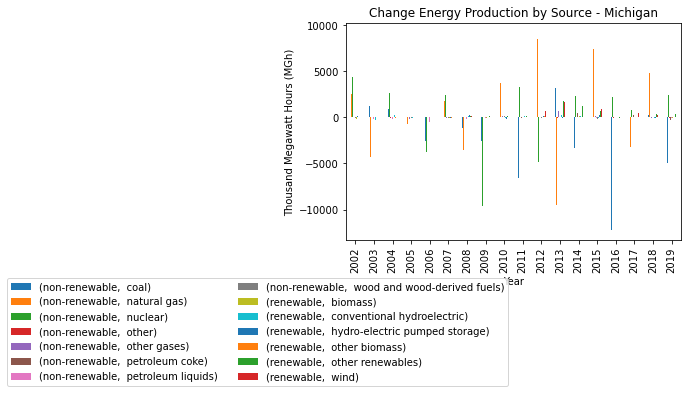

In [27]:
#create a plot showing the change in energy production by source over time for Michigan
MI_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - Michigan")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [30]:
#create a dataframe for the state of Wisconsin
WI_df=filtered_df2.loc[filtered_df2["Location"]=="Wisconsin"]
WI_df=WI_df.drop(columns=["source key", "units", "Location"])

WI_df=WI_df.set_index(["Renewable", "Energy_Source"]).sort_index()
WI_df

3                                            2001   2002   2003   2004   2005  \
Renewable     Energy_Source                                                     
non-renewable  coal                         40219  38598  40589  41008  40571   
               natural gas                   1944   1838   2099   2052   6041   
               nuclear                      11507  12449  12215  11888   9921   
               other                          160    143    138     91     92   
               petroleum coke                  90    105    109    429    368   
               petroleum liquids               87     60     98    111    115   
               wood and wood-derived fuels     23     30     61     98    142   
renewable      biomass                        324    336    382    431    442   
               conventional hydroelectric    1900   2297   1653   1783   1530   
               other biomass                  301    306    321    333    300   
               other renewables               396    382    479    535    534   
               wind                            72     46     98    104     93   
NaN           NaN                             NaN    NaN    NaN    NaN    NaN   

3                                            2006   2007   2008   2009   2010  \
Renewable     Energy_Source                                                     
non-renewable  coal                         38905  38774  40537  36268  39186   
               natural gas                   5139   6222   5010   5269   5332   
               nuclear                      12234  12910  12155  12683  13281   
               other                           76     74     41     31     24   
               petroleum coke                 500    604    581    424    450   
               petroleum liquids              106    128     72     37     33   
               wood and wood-derived fuels    168    193    205    216    272   
renewable      biomass                        536    599    643    669    707   
               conventional hydroelectric    1475   1336   1453   1281   1976   
               other biomass                  369    406    438    453    435   
               other renewables               638    709   1130   1721   1795   
               wind                           101    109    487   1052   1088   
NaN           NaN                             NaN    NaN    NaN    NaN    NaN   

3                                            2011   2012   2013   2014   2015  \
Renewable     Energy_Source                                                     
non-renewable  coal                         38984  31909  39824  36597  36499   
               natural gas                   6066  11357   7889   7794  13104   
               nuclear                      11560  14300  11675   9447  10008   
               other                           31     39     30     27     27   
               petroleum coke                 329     55     61     88     69   
               petroleum liquids               34     38     27     47     25   
               wood and wood-derived fuels    437    513    545    528    451   
renewable      biomass                        939   1009   1004   1004    959   
               conventional hydroelectric    1994   1411   1824   2314   2178   
               other biomass                  502    496    459    476    508   
               other renewables              2127   2567   2562   2616   2542   
               wind                          1188   1558   1558   1611   1582   
NaN           NaN                             NaN    NaN    NaN    NaN    NaN   

3                                            2016   2017   2018   2019  
Renewable     Energy_Source                                             
non-renewable  coal                         32927  35437  32933  26003  
               natural gas                  15032  13110  16067  19514  
               nuclear                      10151   9649  10

In [31]:
#refine the Wisconsin dataframe so the annual data are the data rows
WI_df=WI_df.dropna()
WI_df=WI_df.astype(int)
WI_df=WI_df.T
WI_df

Renewable     non-renewable                                               \
Energy_Source          coal  natural gas  nuclear  other  petroleum coke   
3                                                                          
2001                  40219         1944    11507    160              90   
2002                  38598         1838    12449    143             105   
2003                  40589         2099    12215    138             109   
2004                  41008         2052    11888     91             429   
2005                  40571         6041     9921     92             368   
2006                  38905         5139    12234     76             500   
2007                  38774         6222    12910     74             604   
2008                  40537         5010    12155     41             581   
2009                  36268         5269    12683     31             424   
2010                  39186         5332    13281     24             450   
2011                  38984         6066    11560     31             329   
2012                  31909        11357    14300     39              55   
2013                  39824         7889    11675     30              61   
2014                  36597         7794     9447     27              88   
2015                  36499        13104    10008     27              69   
2016                  32927        15032    10151     18              83   
2017                  35437        13110     9649     17             111   
2018                  32933        16067    10129     17             101   
2019                  26003        19514    10030     21              90   

Renewable                                                     renewable  \
Energy_Source  petroleum liquids  wood and wood-derived fuels   biomass   
3                                                                         
2001                          87                           23       324   
2002                          60                           30       336   
2003                          98                           61       382   
2004                         111                           98       431   
2005                         115                          142       442   
2006                         106                          168       536   
2007                         128                          193       599   
2008                          72                          205       643   
2009                          37                          216       669   
2010                          33                          272       707   
2011                          34                          437       939   
2012                          38                          513      1009   
2013                          27                          545      1004   
2014                          47                          528      1004   
2015                          25                          451       959   
2016                          25                          310       835   
2017                          32                          345       842   
2018                          35                          341       816   
2019                          52                          331       764   

Renewable                                                                   \
Energy_Source  conventional hydroelectric  other biomass  other renewables   
3                                                                            
2001                                 1900            301               396   
2002                                 2297            306               382   
2003                                 1653            321               479   
2004                                 1783            333               535   
2005                                 1530            300               534   
2006                                 1475           

In [32]:
#create a summary table for Wisconsin energy production by source
WI_sum=WI_df.agg(["mean", "std", "min", "max"])

WI_quant=WI_df.quantile([.25, .5, .75])
WI_sum=WI_sum.append(WI_quant)
WI_sum

non-renewable                                                          \
              coal   natural gas       nuclear       other  petroleum coke   
mean  37145.684211   7941.000000  11483.789474   57.736842      244.578947   
std    3898.432349   5258.886152   1398.007295   46.639090      199.104751   
min   26003.000000   1838.000000   9447.000000   17.000000       55.000000   
max   41008.000000  19514.000000  14300.000000  160.000000      604.000000   
0.25  35852.500000   5074.500000  10079.500000   25.500000       89.000000   
0.5   38774.000000   6066.000000  11675.000000   31.000000      109.000000   
0.75  40021.500000  12230.500000  12341.500000   83.500000      426.500000   

                                                        renewable  \
      petroleum liquids  wood and wood-derived fuels      biomass   
mean          61.157895                   274.157895   696.894737   
std           35.163528                   168.206640   237.527752   
min           25.000000                    23.000000   324.000000   
max          128.000000                   545.000000  1009.000000   
0.25          33.500000                   155.000000   489.000000   
0.5           47.000000                   272.000000   707.000000   
0.75          92.500000                   391.000000   890.500000   

                                                                                
      conventional hydroelectric  other biomass  other renewables         wind  
mean                 1910.052632     422.684211       1615.000000   913.052632  
std                   430.592547      77.494124        934.152617   709.672184  
min                  1281.000000     300.000000        382.000000    46.000000  
max                  2619.000000     525.000000       2648.000000  1849.000000  
0.25                 1502.500000     351.000000        586.500000   102.500000  
0.5                  1900.000000     438.000000       1795.000000  1088.000000  
0.75                 2274.000000     486.000000       2519.000000  1570.000000

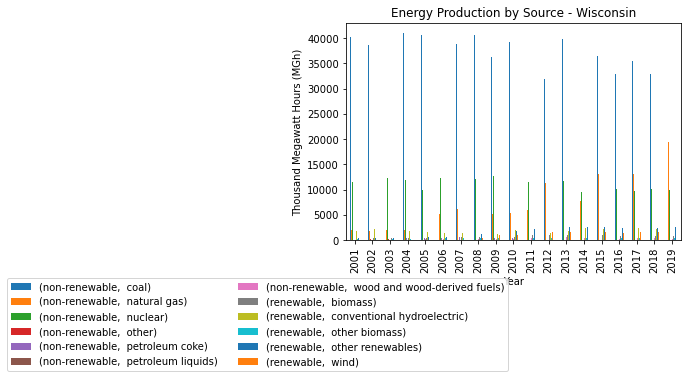

In [33]:
#create a plot showing energy production in the state over time
WI_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Wisconsin")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [34]:
#create a dataframe for change in energy production for Wisconsin
WI_delta=WI_df.diff(axis=0)
WI_delta=WI_delta.drop("2001")
WI_delta

Renewable     non-renewable                                               \
Energy_Source          coal  natural gas  nuclear  other  petroleum coke   
3                                                                          
2002                -1621.0       -106.0    942.0  -17.0            15.0   
2003                 1991.0        261.0   -234.0   -5.0             4.0   
2004                  419.0        -47.0   -327.0  -47.0           320.0   
2005                 -437.0       3989.0  -1967.0    1.0           -61.0   
2006                -1666.0       -902.0   2313.0  -16.0           132.0   
2007                 -131.0       1083.0    676.0   -2.0           104.0   
2008                 1763.0      -1212.0   -755.0  -33.0           -23.0   
2009                -4269.0        259.0    528.0  -10.0          -157.0   
2010                 2918.0         63.0    598.0   -7.0            26.0   
2011                 -202.0        734.0  -1721.0    7.0          -121.0   
2012                -7075.0       5291.0   2740.0    8.0          -274.0   
2013                 7915.0      -3468.0  -2625.0   -9.0             6.0   
2014                -3227.0        -95.0  -2228.0   -3.0            27.0   
2015                  -98.0       5310.0    561.0    0.0           -19.0   
2016                -3572.0       1928.0    143.0   -9.0            14.0   
2017                 2510.0      -1922.0   -502.0   -1.0            28.0   
2018                -2504.0       2957.0    480.0    0.0           -10.0   
2019                -6930.0       3447.0    -99.0    4.0           -11.0   

Renewable                                                     renewable  \
Energy_Source  petroleum liquids  wood and wood-derived fuels   biomass   
3                                                                         
2002                       -27.0                          7.0      12.0   
2003                        38.0                         31.0      46.0   
2004                        13.0                         37.0      49.0   
2005                         4.0                         44.0      11.0   
2006                        -9.0                         26.0      94.0   
2007                        22.0                         25.0      63.0   
2008                       -56.0                         12.0      44.0   
2009                       -35.0                         11.0      26.0   
2010                        -4.0                         56.0      38.0   
2011                         1.0                        165.0     232.0   
2012                         4.0                         76.0      70.0   
2013                       -11.0                         32.0      -5.0   
2014                        20.0                        -17.0       0.0   
2015                       -22.0                        -77.0     -45.0   
2016                         0.0                       -141.0    -124.0   
2017                         7.0                         35.0       7.0   
2018                         3.0                         -4.0     -26.0   
2019                        17.0                        -10.0     -52.0   

Renewable                                                                   \
Energy_Source  conventional hydroelectric  other biomass  other renewables   
3                                                                            
2002                                397.0            5.0             -14.0   
2003                               -644.0           15.0              97.0   
2004                                130.0           12.0              56.0   
2005                               -253.0          -33.0              -1.0   
2006                                -55.0           69.0             104.0   
2007                               -139.0           37.0              71.0   
2008                                117.0           32.0             421.0   
2009                               -172.0      

In [35]:
#create a summary table for changes in Wisconsin energy production by source
WI_delta_sum=WI_delta.agg(["mean", "std", "min", "max"])

WI_delta_quant=WI_delta.quantile([.25, .5, .75])
WI_delta_sum=WI_delta_sum.append(WI_delta_quant)
WI_delta_sum

non-renewable                                                       \
              coal  natural gas      nuclear      other  petroleum coke   
mean   -789.777778   976.111111   -82.055556  -7.722222        0.000000   
std    3637.158952  2415.299443  1434.075331  13.825831      121.872643   
min   -7075.000000 -3468.000000 -2625.000000 -47.000000     -274.000000   
max    7915.000000  5310.000000  2740.000000   8.000000      320.000000   
0.25  -3046.250000  -103.250000  -691.750000  -9.750000      -22.000000   
0.5    -319.500000   260.000000    22.000000  -4.000000        5.000000   
0.75   1427.000000  2699.750000   588.750000   0.000000       26.750000   

                                                       renewable  \
      petroleum liquids  wood and wood-derived fuels     biomass   
mean          -1.944444                    17.111111   24.444444   
std           22.493064                    61.935345   72.948993   
min          -56.000000                  -141.000000 -124.000000   
max           38.000000                   165.000000  232.000000   
0.25         -10.500000                    -1.250000   -3.750000   
0.5            2.000000                    25.500000   19.000000   
0.75          11.500000                    36.500000   48.250000   

                                                                               
      conventional hydroelectric  other biomass  other renewables        wind  
mean                   34.833333       7.277778        125.111111   98.722222  
std                   367.314299      33.307490        201.137322  174.965477  
min                  -644.000000     -43.000000       -196.000000  -74.000000  
max                   695.000000      69.000000        591.000000  565.000000  
0.25                 -163.750000     -20.250000         -4.000000   -8.250000  
0.5                   -18.500000      13.500000         72.500000   22.000000  
0.75                  366.750000      28.250000        177.000000  118.750000

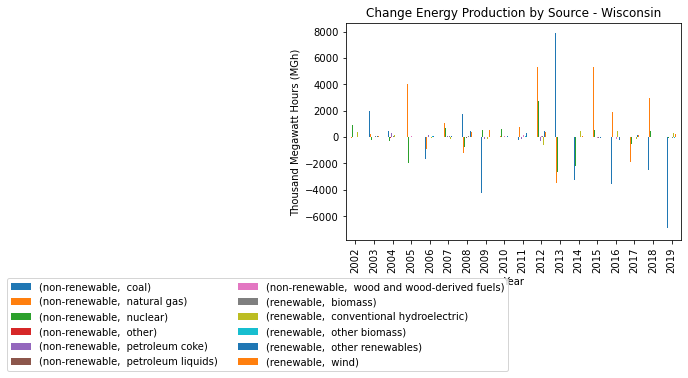

In [36]:
#create a plot showing the change in energy production by source over time for Wisconsin
WI_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - Wisconsin")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [37]:
#create a dataframe for the state of Illinois
IL_df=filtered_df2.loc[filtered_df2["Location"]=="Illinois"]
IL_df=IL_df.drop(columns=["source key", "units", "Location"])

IL_df=IL_df.set_index(["Renewable", "Energy_Source"]).sort_index()
IL_df

3                                           2001   2002   2003   2004   2005  \
Renewable     Energy_Source                                                    
non-renewable  coal                        77698  84716  85899  92220  89966   
               natural gas                  3962   8089   3010   2473   6210   
               nuclear                     92358  90860  94733  92047  93263   
               other                          39    114    142    120     18   
               petroleum liquids            1487    222   1118    645    222   
renewable      biomass                       603    653    727    667    564   
               conventional hydroelectric    141    129    138    150    129   
               other biomass                 603    653    727    667    564   
               other renewables              603    653    745    745    706   
NaN           NaN                            NaN    NaN    NaN    NaN    NaN   

3                                           2006   2007   2008   2009   2010  \
Renewable     Energy_Source                                                    
non-renewable  coal                        89141  92816  94453  88194  91713   
               natural gas                  4598   6690   3481   3599   4894   
               nuclear                     94154  95729  95152  95474  96190   
               other                          15      1     33     18     17   
               petroleum liquids             116    131    142    112    110   
renewable      biomass                       594    620    697    709    670   
               conventional hydroelectric    173    154    139    136    119   
               other biomass                 594    620    697    709    670   
               other renewables              848   1284   3034   3529   5138   
NaN           NaN                            NaN    NaN    NaN    NaN    NaN   

3                                           2011   2012   2013   2014   2015  \
Renewable     Energy_Source                                                    
non-renewable  coal                        88114  79041  86201  85491  72119   
               natural gas                  5157  10443   5876   4550   9905   
               nuclear                     95823  96401  97131  97858  97282   
               other                           6      0      0      0     -5   
               petroleum liquids              84     71     72     87     56   
renewable      biomass                       638    615    608    566    527   
               conventional hydroelectric    140    109    119    129    123   
               other biomass                 638    615    608    566    527   
               other renewables             6865   8372  10285  10696  11318   
NaN           NaN                            NaN    NaN    NaN    NaN    NaN   

3                                           2016   2017   2018   2019  
Renewable     Energy_Source                                            
non-renewable  coal                        57816  56405  57862  47254  
               natural gas                 16473  13885  16264  20456  
               nuclear                     98607  97191  98102  98735  
               other                         -16    -25    -19    -10  
               petroleum liquids              68     51     53     43  
renewable      biomass                       467    474    426    412  
               conventional hydroelectric    131    124    145    123  
               other biomass                 467    474    426    412  
               other renewables            11175  12789  12383  14926  
NaN           NaN                            NaN    NaN    NaN    NaN

In [38]:
#refine the Illinois dataframe so the annual data are the data rows
IL_df=IL_df.dropna()
IL_df=IL_df.astype(int)
IL_df=IL_df.T
IL_df

Renewable     non-renewable                                                  \
Energy_Source          coal  natural gas  nuclear  other  petroleum liquids   
3                                                                             
2001                  77698         3962    92358     39               1487   
2002                  84716         8089    90860    114                222   
2003                  85899         3010    94733    142               1118   
2004                  92220         2473    92047    120                645   
2005                  89966         6210    93263     18                222   
2006                  89141         4598    94154     15                116   
2007                  92816         6690    95729      1                131   
2008                  94453         3481    95152     33                142   
2009                  88194         3599    95474     18                112   
2010                  91713         4894    96190     17                110   
2011                  88114         5157    95823      6                 84   
2012                  79041        10443    96401      0                 71   
2013                  86201         5876    97131      0                 72   
2014                  85491         4550    97858      0                 87   
2015                  72119         9905    97282     -5                 56   
2016                  57816        16473    98607    -16                 68   
2017                  56405        13885    97191    -25                 51   
2018                  57862        16264    98102    -19                 53   
2019                  47254        20456    98735    -10                 43   

Renewable     renewable                                             \
Energy_Source   biomass  conventional hydroelectric  other biomass   
3                                                                    
2001                603                         141            603   
2002                653                         129            653   
2003                727                         138            727   
2004                667                         150            667   
2005                564                         129            564   
2006                594                         173            594   
2007                620                         154            620   
2008                697                         139            697   
2009                709                         136            709   
2010                670                         119            670   
2011                638                         140            638   
2012                615                         109            615   
2013                608                         119            608   
2014                566                         129            566   
2015                527                         123            527   
2016                467                         131            467   
2017                474                         124            474   
2018                426                         145            426   
2019                412                         123            412   

Renewable                        
Energy_Source  other renewables  
3                                
2001                        603  
2002                        653  
2003                        745  
2004                        745  
2005                        706  
2006                        848  
2007                       1284  
2008                       3034  
2009                       3529  
2010                       5138  
2011                       6865  
2012                       8372  
2013                      10285  
2014                      10696  
2015                      11318  
2016                      11175  
2017                      12789  
2018                      12383  
2019  

In [39]:
#create a summary table for Illinois energy production by source
IL_sum=IL_df.agg(["mean", "std", "min", "max"])

IL_quant=IL_df.quantile([.25, .5, .75])
IL_sum=IL_sum.append(IL_quant)
IL_sum

non-renewable                                                             \
              coal   natural gas       nuclear       other  petroleum liquids   
mean  79848.368421   7895.526316  95636.315789   23.578947         257.368421   
std   14491.950790   5278.096252   2274.092592   48.403760         396.684063   
min   47254.000000   2473.000000  90860.000000  -25.000000          43.000000   
max   94453.000000  20456.000000  98735.000000  142.000000        1487.000000   
0.25  74908.500000   4256.000000  94443.500000   -2.500000          69.500000   
0.5   85899.000000   5876.000000  95823.000000    6.000000         110.000000   
0.75  89553.500000  10174.000000  97236.500000   25.500000         182.000000   

       renewable                                                               
         biomass  conventional hydroelectric  other biomass  other renewables  
mean  591.421053                  134.263158     591.421053       6110.210526  
std    93.500633                   14.771753      93.500633       5129.057793  
min   412.000000                  109.000000     412.000000        603.000000  
max   727.000000                  173.000000     727.000000      14926.000000  
0.25  545.500000                  123.500000     545.500000        796.500000  
0.5   608.000000                  131.000000     608.000000       5138.000000  
0.75  660.000000                  140.500000     660.000000      10935.500000

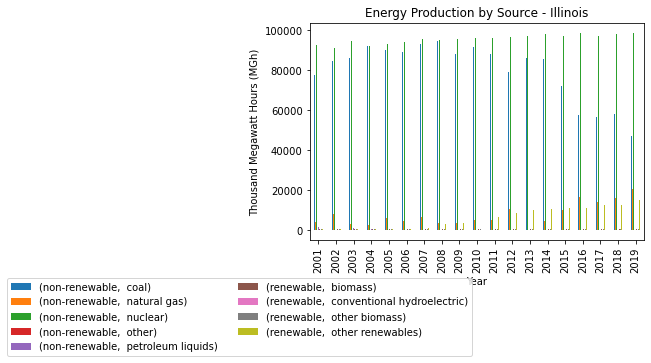

In [40]:
#create a plot showing energy production in the state over time
IL_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Illinois")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [41]:
#create a dataframe for change in energy production for Illinois
IL_delta=IL_df.diff(axis=0)
IL_delta=IL_delta.drop("2001")
IL_delta

Renewable     non-renewable                                                  \
Energy_Source          coal  natural gas  nuclear  other  petroleum liquids   
3                                                                             
2002                 7018.0       4127.0  -1498.0   75.0            -1265.0   
2003                 1183.0      -5079.0   3873.0   28.0              896.0   
2004                 6321.0       -537.0  -2686.0  -22.0             -473.0   
2005                -2254.0       3737.0   1216.0 -102.0             -423.0   
2006                 -825.0      -1612.0    891.0   -3.0             -106.0   
2007                 3675.0       2092.0   1575.0  -14.0               15.0   
2008                 1637.0      -3209.0   -577.0   32.0               11.0   
2009                -6259.0        118.0    322.0  -15.0              -30.0   
2010                 3519.0       1295.0    716.0   -1.0               -2.0   
2011                -3599.0        263.0   -367.0  -11.0              -26.0   
2012                -9073.0       5286.0    578.0   -6.0              -13.0   
2013                 7160.0      -4567.0    730.0    0.0                1.0   
2014                 -710.0      -1326.0    727.0    0.0               15.0   
2015               -13372.0       5355.0   -576.0   -5.0              -31.0   
2016               -14303.0       6568.0   1325.0  -11.0               12.0   
2017                -1411.0      -2588.0  -1416.0   -9.0              -17.0   
2018                 1457.0       2379.0    911.0    6.0                2.0   
2019               -10608.0       4192.0    633.0    9.0              -10.0   

Renewable     renewable                                             \
Energy_Source   biomass  conventional hydroelectric  other biomass   
3                                                                    
2002               50.0                       -12.0           50.0   
2003               74.0                         9.0           74.0   
2004              -60.0                        12.0          -60.0   
2005             -103.0                       -21.0         -103.0   
2006               30.0                        44.0           30.0   
2007               26.0                       -19.0           26.0   
2008               77.0                       -15.0           77.0   
2009               12.0                        -3.0           12.0   
2010              -39.0                       -17.0          -39.0   
2011              -32.0                        21.0          -32.0   
2012              -23.0                       -31.0          -23.0   
2013               -7.0                        10.0           -7.0   
2014              -42.0                        10.0          -42.0   
2015              -39.0                        -6.0          -39.0   
2016              -60.0                         8.0          -60.0   
2017                7.0                        -7.0            7.0   
2018              -48.0                        21.0          -48.0   
2019              -14.0                       -22.0          -14.0   

Renewable                        
Energy_Source  other renewables  
3                                
2002                       50.0  
2003                       92.0  
2004                        0.0  
2005                      -39.0  
2006                      142.0  
2007                      436.0  
2008                     1750.0  
2009                      495.0  
2010                     1609.0  
2011                     1727.0  
2012                     1507.0  
2013                     1913.0  
2014                      411.0  
2015                      622.0  
2016                     -143.0  
2017                     1614.0  
2018                     -406.0  
2019                     2543.0

In [42]:
#create a summary table for changes in Illinois energy production by source
IL_delta_sum=IL_delta.agg(["mean", "std", "min", "max"])

IL_delta_quant=IL_delta.quantile([.25, .5, .75])
IL_delta_sum=IL_delta_sum.append(IL_delta_quant)
IL_delta_sum

non-renewable                                                           \
              coal  natural gas      nuclear       other  petroleum liquids   
mean  -1691.333333   916.333333   354.277778   -2.722222         -80.222222   
std    6684.892256  3542.209115  1429.833384   33.536294         398.889127   
min  -14303.000000 -5079.000000 -2686.000000 -102.000000       -1265.000000   
max    7160.000000  6568.000000  3873.000000   75.000000         896.000000   
0.25  -5594.000000 -1540.500000  -523.750000  -11.000000         -30.750000   
0.5    -767.500000   779.000000   674.500000   -4.000000         -11.500000   
0.75   3048.500000  4029.500000   906.000000    4.500000           8.750000   

       renewable                                                               
         biomass  conventional hydroelectric  other biomass  other renewables  
mean  -10.611111                   -1.000000     -10.611111        795.722222  
std    48.727500                   19.232326      48.727500        889.418303  
min  -103.000000                  -31.000000    -103.000000       -406.000000  
max    77.000000                   44.000000      77.000000       2543.000000  
0.25  -41.250000                  -16.500000     -41.250000         60.500000  
0.5   -18.500000                   -4.500000     -18.500000        465.500000  
0.75   22.500000                   10.000000      22.500000       1612.750000

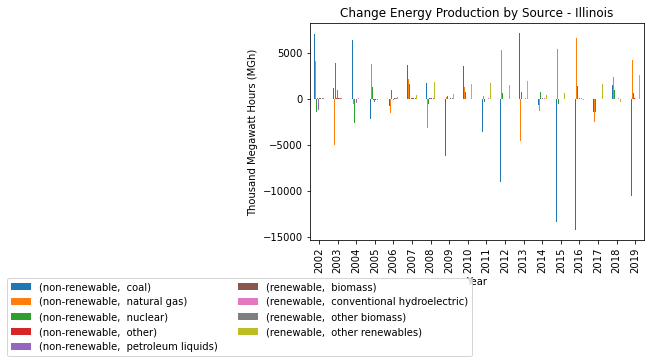

In [43]:
#create a plot showing the change in energy production by source over time for Illinois
IL_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - Illinois")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [44]:
#create a dataframe for the state of Indiana
IN_df=filtered_df2.loc[filtered_df2["Location"]=="Indiana"]
IN_df=IN_df.drop(columns=["source key", "units", "Location"])

IN_df=IN_df.set_index(["Renewable", "Energy_Source"]).sort_index()
IN_df

3                                            2001    2002    2003    2004  \
Renewable     Energy_Source                                                 
non-renewable  coal                        115844  117427  117537  120418   
               natural gas                   1464    3527    2823    2208   
               petroleum coke                 167     304     231     254   
               petroleum liquids              205     168     177     139   
renewable      biomass                         89      89      85      86   
               conventional hydroelectric     571     411     424     444   
               other biomass                   89      89      85      86   
               other renewables                89      89      85      86   
NaN           NaN                             NaN     NaN     NaN     NaN   

3                                            2005    2006    2007    2008  \
Renewable     Energy_Source                                                 
non-renewable  coal                        122572  123416  122589  121847   
               natural gas                   3379    2438    3777    3112   
               petroleum coke                  99       0       0       0   
               petroleum liquids              147     134     155     165   
renewable      biomass                         20     174     190     229   
               conventional hydroelectric     438     490     450     437   
               other biomass                   20     174     190     229   
               other renewables                20     174     190     468   
NaN           NaN                             NaN     NaN     NaN     NaN   

3                                            2009    2010    2011   2012  \
Renewable     Energy_Source                                                
non-renewable  coal                        108149  112133  103974  92279   
               natural gas                   3349    5910    9533  13998   
               petroleum coke                  10       0    1161    831   
               petroleum liquids              133     138     157    108   
renewable      biomass                        259     274     295    286   
               conventional hydroelectric     503     454     409    434   
               other biomass                  259     274     295    286   
               other renewables              1663    3206    3579   3495   
NaN           NaN                             NaN     NaN     NaN    NaN   

3                                           2013   2014   2015   2016   2017  \
Renewable     Energy_Source                                                    
non-renewable  coal                        92538  97468  78193  72481  72351   
               natural gas                  8533   9006  15553  19320  16505   
               petroleum coke               1433   1199   1179    497      0   
               petroleum liquids             131    149    141    101    108   
renewable      biomass                       315    304    355    338    373   
               conventional hydroelectric    387    371    381    426    306   
               other biomass                 315    304    355    338    373   
               other renewables             3825   3901   5025   5462   5739   
NaN           NaN                            NaN    NaN    NaN    NaN    NaN   

3                                           2018   2019  
Renewable     Energy_Source                              
non-renewable  coal                        77417  60717  
               natural gas                 25120  29815  
               petroleum coke                  0      0  
               petroleum liquids             111    119  
renewable      biomass                       369    379  
               conventional hydroelectric    223    256  
               other biomass                 369    379  
               other renewables             6097   6916  
NaN   

In [45]:
#refine the Indiana dataframe so the annual data are the data rows
IN_df=IN_df.dropna()
IN_df=IN_df.astype(int)
IN_df=IN_df.T
IN_df

Renewable     non-renewable                                                  \
Energy_Source          coal  natural gas  petroleum coke  petroleum liquids   
3                                                                             
2001                 115844         1464             167                205   
2002                 117427         3527             304                168   
2003                 117537         2823             231                177   
2004                 120418         2208             254                139   
2005                 122572         3379              99                147   
2006                 123416         2438               0                134   
2007                 122589         3777               0                155   
2008                 121847         3112               0                165   
2009                 108149         3349              10                133   
2010                 112133         5910               0                138   
2011                 103974         9533            1161                157   
2012                  92279        13998             831                108   
2013                  92538         8533            1433                131   
2014                  97468         9006            1199                149   
2015                  78193        15553            1179                141   
2016                  72481        19320             497                101   
2017                  72351        16505               0                108   
2018                  77417        25120               0                111   
2019                  60717        29815               0                119   

Renewable     renewable                                             \
Energy_Source   biomass  conventional hydroelectric  other biomass   
3                                                                    
2001                 89                         571             89   
2002                 89                         411             89   
2003                 85                         424             85   
2004                 86                         444             86   
2005                 20                         438             20   
2006                174                         490            174   
2007                190                         450            190   
2008                229                         437            229   
2009                259                         503            259   
2010                274                         454            274   
2011                295                         409            295   
2012                286                         434            286   
2013                315                         387            315   
2014                304                         371            304   
2015                355                         381            355   
2016                338                         426            338   
2017                373                         306            373   
2018                369                         223            369   
2019                379                         256            379   

Renewable                        
Energy_Source  other renewables  
3                                
2001                         89  
2002                         89  
2003                         85  
2004                         86  
2005                         20  
2006                        174  
2007                        190  
2008                        468  
2009                       1663  
2010                       3206  
2011                       3579  
2012                       3495  
2013                       3825  
2014                       3901  
2015                       5025  
2016                       5462  
2017                       5739  
2018                       6097  
2019  

In [46]:
#create a summary table for Indiana energy production by source
IN_sum=IN_df.agg(["mean", "std", "min", "max"])

IN_quant=IN_df.quantile([.25, .5, .75])
IN_sum=IN_sum.append(IN_quant)
IN_sum

non-renewable                                                   \
               coal   natural gas  petroleum coke  petroleum liquids   
mean  101544.736842   9440.526316      387.631579         141.368421   
std    20656.937180   8399.074515      503.311171          26.493627   
min    60717.000000   1464.000000        0.000000         101.000000   
max   123416.000000  29815.000000     1433.000000         205.000000   
0.25   85236.000000   3230.500000        0.000000         125.000000   
0.5   108149.000000   5910.000000      167.000000         139.000000   
0.75  118977.500000  14775.500000      664.000000         156.000000   

       renewable                                                               
         biomass  conventional hydroelectric  other biomass  other renewables  
mean  237.315789                  411.315789     237.315789       2637.315789  
std   115.816451                   81.841346     115.816451       2461.981565  
min    20.000000                  223.000000      20.000000         20.000000  
max   379.000000                  571.000000     379.000000       6916.000000  
0.25  131.500000                  384.000000     131.500000        131.500000  
0.5   274.000000                  426.000000     274.000000       3206.000000  
0.75  326.500000                  447.000000     326.500000       4463.000000

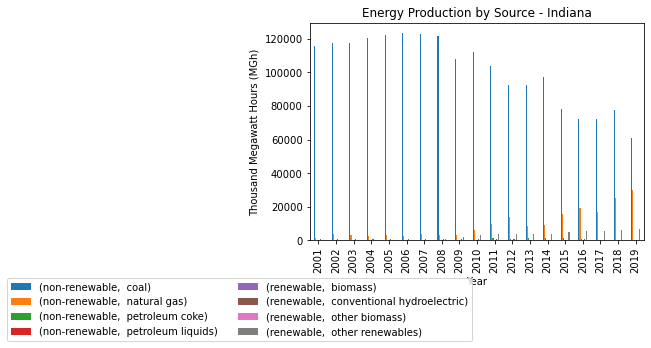

In [47]:
#create a plot showing energy production in the state over time
IN_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Indiana")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [48]:
#create a dataframe for change in energy production for Indiana
IN_delta=IN_df.diff(axis=0)
IN_delta=IN_delta.drop("2001")
IN_delta

Renewable     non-renewable                                                  \
Energy_Source          coal  natural gas  petroleum coke  petroleum liquids   
3                                                                             
2002                 1583.0       2063.0           137.0              -37.0   
2003                  110.0       -704.0           -73.0                9.0   
2004                 2881.0       -615.0            23.0              -38.0   
2005                 2154.0       1171.0          -155.0                8.0   
2006                  844.0       -941.0           -99.0              -13.0   
2007                 -827.0       1339.0             0.0               21.0   
2008                 -742.0       -665.0             0.0               10.0   
2009               -13698.0        237.0            10.0              -32.0   
2010                 3984.0       2561.0           -10.0                5.0   
2011                -8159.0       3623.0          1161.0               19.0   
2012               -11695.0       4465.0          -330.0              -49.0   
2013                  259.0      -5465.0           602.0               23.0   
2014                 4930.0        473.0          -234.0               18.0   
2015               -19275.0       6547.0           -20.0               -8.0   
2016                -5712.0       3767.0          -682.0              -40.0   
2017                 -130.0      -2815.0          -497.0                7.0   
2018                 5066.0       8615.0             0.0                3.0   
2019               -16700.0       4695.0             0.0                8.0   

Renewable     renewable                                             \
Energy_Source   biomass  conventional hydroelectric  other biomass   
3                                                                    
2002                0.0                      -160.0            0.0   
2003               -4.0                        13.0           -4.0   
2004                1.0                        20.0            1.0   
2005              -66.0                        -6.0          -66.0   
2006              154.0                        52.0          154.0   
2007               16.0                       -40.0           16.0   
2008               39.0                       -13.0           39.0   
2009               30.0                        66.0           30.0   
2010               15.0                       -49.0           15.0   
2011               21.0                       -45.0           21.0   
2012               -9.0                        25.0           -9.0   
2013               29.0                       -47.0           29.0   
2014              -11.0                       -16.0          -11.0   
2015               51.0                        10.0           51.0   
2016              -17.0                        45.0          -17.0   
2017               35.0                      -120.0           35.0   
2018               -4.0                       -83.0           -4.0   
2019               10.0                        33.0           10.0   

Renewable                        
Energy_Source  other renewables  
3                                
2002                        0.0  
2003                       -4.0  
2004                        1.0  
2005                      -66.0  
2006                      154.0  
2007                       16.0  
2008                      278.0  
2009                     1195.0  
2010                     1543.0  
2011                      373.0  
2012                      -84.0  
2013                      330.0  
2014                       76.0  
2015                     1124.0  
2016                      437.0  
2017                      277.0  
2018                      358.0  
2019                      819.0

In [49]:
#create a summary table for changes in Indiana energy production by source
IN_delta_sum=IN_delta.agg(["mean", "std", "min", "max"])

IN_delta_quant=IN_delta.quantile([.25, .5, .75])
IN_delta_sum=IN_delta_sum.append(IN_delta_quant)
IN_delta_sum

non-renewable                                                  \
              coal  natural gas  petroleum coke  petroleum liquids   
mean  -3062.611111  1575.055556       -9.277778          -4.777778   
std    7625.490165  3395.268758      394.343655          23.895743   
min  -19275.000000 -5465.000000     -682.000000         -49.000000   
max    5066.000000  8615.000000     1161.000000          23.000000   
0.25  -7547.250000  -652.500000     -141.000000         -27.250000   
0.5     -10.000000  1255.000000       -5.000000           6.000000   
0.75   2011.250000  3731.000000        7.500000           9.750000   

       renewable                                                               
         biomass  conventional hydroelectric  other biomass  other renewables  
mean   16.111111                   -17.50000      16.111111        379.277778  
std    43.408984                    60.16668      43.408984        479.953038  
min   -66.000000                  -160.00000     -66.000000        -84.000000  
max   154.000000                    66.00000     154.000000       1543.000000  
0.25   -4.000000                   -46.50000      -4.000000          4.750000  
0.5    12.500000                    -9.50000      12.500000        277.500000  
0.75   29.750000                    23.75000      29.750000        421.000000

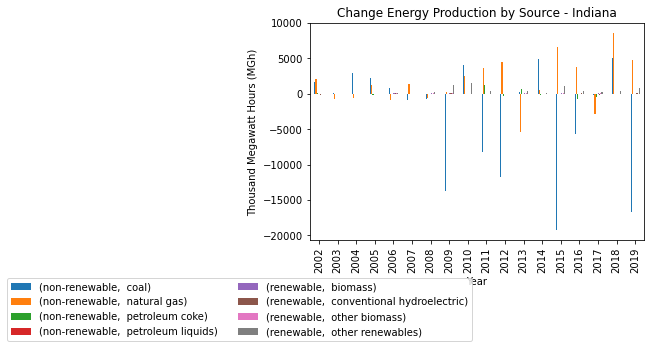

In [50]:
#create a plot showing the change in energy production by source over time for Indiana
IN_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - Indiana")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [51]:
#create a dataframe for the state of Ohio
OH_df=filtered_df2.loc[filtered_df2["Location"]=="Ohio"]
OH_df=OH_df.drop(columns=["source key", "units", "Location"])

OH_df=OH_df.set_index(["Renewable", "Energy_Source"]).sort_index()
OH_df

3                                             2001    2002    2003    2004  \
Renewable     Energy_Source                                                  
non-renewable  coal                         123687  132706  134257  127712   
               natural gas                     737    1737    1745    1357   
               nuclear                       15464   10865    8475   15950   
               other gases                     119     155     124     123   
               petroleum liquids               411     388     402     344   
               wood and wood-derived fuels      39      43      51      46   
renewable      biomass                          67      66      78      73   
               conventional hydroelectric      511     488     511     730   
               other biomass                    28      23      27      26   
               other renewables                 67      66      78      73   
NaN           NaN                              NaN     NaN     NaN     NaN   

3                                             2005    2006    2007    2008  \
Renewable     Energy_Source                                                  
non-renewable  coal                         136334  132945  132781  130326   
               natural gas                    2663    2346    3946    2451   
               nuclear                       14803   16847   15764   17514   
               other gases                     117     137     154     108   
               petroleum liquids               352     299     307     288   
               wood and wood-derived fuels      44      38      31      29   
renewable      biomass                          67      62      42     212   
               conventional hydroelectric      516     632     410     386   
               other biomass                    23      24      11     183   
               other renewables                 80      76      57     227   
NaN           NaN                              NaN     NaN     NaN     NaN   

3                                             2009    2010    2011   2012  \
Renewable     Energy_Source                                                 
non-renewable  coal                         113383  117484  105021  85346   
               natural gas                    4620    7083   12104  22285   
               nuclear                       15206   15805   14890  17087   
               other gases                       4     105     116    350   
               petroleum liquids               255     296     312    256   
               wood and wood-derived fuels      23      28      25     24   
renewable      biomass                         221     291     340    377   
               conventional hydroelectric      528     429     384    414   
               other biomass                   198     264     315    353   
               other renewables                235     317     552   1387   
NaN           NaN                              NaN     NaN     NaN    NaN   

3                                            2013   2014   2015   2016   2017  \
Renewable     Energy_Source                                                     
non-renewable  coal                         94341  89639  71497  68662  68334   
               natural gas                  21461  23491  27833  28627  28394   
               nuclear                      16121  16284  17377  16817  17688   
               other gases                    746    725    748    553    623   
               petroleum liquids              224    302    214    212    203   
               wood and wood-derived fuels     27     30     30     31     29   
renewable      biomass                        488    478    480    462    483   
               conventional hydroelectric     549    478    457    500    277   
               other biomass                  461    448    450    432    454   
               other renewables              1647   1647   1700   1714   2113

In [52]:
#refine the Ohio dataframe so the annual data are the data rows
OH_df=OH_df.dropna()
OH_df=OH_df.astype(int)
OH_df=OH_df.T
OH_df

Renewable     non-renewable                                     \
Energy_Source          coal  natural gas  nuclear  other gases   
3                                                                
2001                 123687          737    15464          119   
2002                 132706         1737    10865          155   
2003                 134257         1745     8475          124   
2004                 127712         1357    15950          123   
2005                 136334         2663    14803          117   
2006                 132945         2346    16847          137   
2007                 132781         3946    15764          154   
2008                 130326         2451    17514          108   
2009                 113383         4620    15206            4   
2010                 117484         7083    15805          105   
2011                 105021        12104    14890          116   
2012                  85346        22285    17087          350   
2013                  94341        21461    16121          746   
2014                  89639        23491    16284          725   
2015                  71497        27833    17377          748   
2016                  68662        28627    16817          553   
2017                  68334        28394    17688          623   
2018                  58721        43765    18315          630   
2019                  46762        50875    17011          631   

Renewable                                                     renewable  \
Energy_Source  petroleum liquids  wood and wood-derived fuels   biomass   
3                                                                         
2001                         411                           39        67   
2002                         388                           43        66   
2003                         402                           51        78   
2004                         344                           46        73   
2005                         352                           44        67   
2006                         299                           38        62   
2007                         307                           31        42   
2008                         288                           29       212   
2009                         255                           23       221   
2010                         296                           28       291   
2011                         312                           25       340   
2012                         256                           24       377   
2013                         224                           27       488   
2014                         302                           30       478   
2015                         214                           30       480   
2016                         212                           31       462   
2017                         203                           29       483   
2018                         214                           27       484   
2019                         161                           25       452   

Renewable                                                                   
Energy_Source  conventional hydroelectric  other biomass  other renewables  
3                                                                           
2001                                  511             28                67  
2002                                  488             23                66  
2003                                  511             27                78  
2004                                  730             26                73  
2005                                  516             23                80  
2006                                  632             24                76  
2007                                  410             11                57  
2008                                  386            183               227  
2009                                  528        

In [53]:
#create a summary table for Ohio energy production by source
OH_sum=OH_df.agg(["mean", "std", "min", "max"])

OH_quant=OH_df.quantile([.25, .5, .75])
OH_sum=OH_sum.append(OH_quant)
OH_sum

non-renewable                                           \
               coal   natural gas       nuclear  other gases   
mean  103680.947368  15132.631579  15699.105263   329.894737   
std    29734.188251  15496.899723   2369.168581   273.494850   
min    46762.000000    737.000000   8475.000000     4.000000   
max   136334.000000  50875.000000  18315.000000   748.000000   
0.25   78421.500000   2398.500000  15335.000000   118.000000   
0.5   113383.000000   7083.000000  16121.000000   154.000000   
0.75  131516.000000  25662.000000  17049.000000   626.500000   

                                                       renewable  \
      petroleum liquids  wood and wood-derived fuels     biomass   
mean         286.315789                    32.631579  274.894737   
std           71.845554                     8.287947  184.555892   
min          161.000000                    23.000000   42.000000   
max          411.000000                    51.000000  488.000000   
0.25         219.000000                    27.000000   70.000000   
0.5          296.000000                    30.000000  291.000000   
0.75         328.000000                    38.500000  470.000000   

                                                                   
      conventional hydroelectric  other biomass  other renewables  
mean                  465.631579     242.315789        888.052632  
std                   111.978277     190.640456        911.062229  
min                   244.000000      11.000000         57.000000  
max                   730.000000     461.000000       2555.000000  
0.25                  406.500000      26.500000         77.000000  
0.5                   478.000000     264.000000        317.000000  
0.75                  513.500000     440.000000       1673.500000

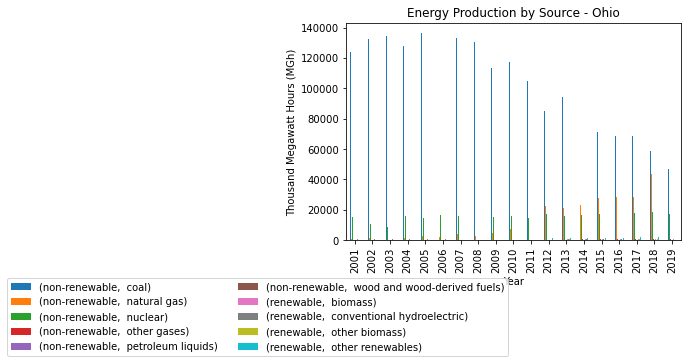

In [54]:
#create a plot showing energy production in the state over time
OH_df.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Energy Production by Source - Ohio")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [55]:
#create a dataframe for change in energy production for Ohio
OH_delta=OH_df.diff(axis=0)
OH_delta=OH_delta.drop("2001")
OH_delta

Renewable     non-renewable                                     \
Energy_Source          coal  natural gas  nuclear  other gases   
3                                                                
2002                 9019.0       1000.0  -4599.0         36.0   
2003                 1551.0          8.0  -2390.0        -31.0   
2004                -6545.0       -388.0   7475.0         -1.0   
2005                 8622.0       1306.0  -1147.0         -6.0   
2006                -3389.0       -317.0   2044.0         20.0   
2007                 -164.0       1600.0  -1083.0         17.0   
2008                -2455.0      -1495.0   1750.0        -46.0   
2009               -16943.0       2169.0  -2308.0       -104.0   
2010                 4101.0       2463.0    599.0        101.0   
2011               -12463.0       5021.0   -915.0         11.0   
2012               -19675.0      10181.0   2197.0        234.0   
2013                 8995.0       -824.0   -966.0        396.0   
2014                -4702.0       2030.0    163.0        -21.0   
2015               -18142.0       4342.0   1093.0         23.0   
2016                -2835.0        794.0   -560.0       -195.0   
2017                 -328.0       -233.0    871.0         70.0   
2018                -9613.0      15371.0    627.0          7.0   
2019               -11959.0       7110.0  -1304.0          1.0   

Renewable                                                     renewable  \
Energy_Source  petroleum liquids  wood and wood-derived fuels   biomass   
3                                                                         
2002                       -23.0                          4.0      -1.0   
2003                        14.0                          8.0      12.0   
2004                       -58.0                         -5.0      -5.0   
2005                         8.0                         -2.0      -6.0   
2006                       -53.0                         -6.0      -5.0   
2007                         8.0                         -7.0     -20.0   
2008                       -19.0                         -2.0     170.0   
2009                       -33.0                         -6.0       9.0   
2010                        41.0                          5.0      70.0   
2011                        16.0                         -3.0      49.0   
2012                       -56.0                         -1.0      37.0   
2013                       -32.0                          3.0     111.0   
2014                        78.0                          3.0     -10.0   
2015                       -88.0                          0.0       2.0   
2016                        -2.0                          1.0     -18.0   
2017                        -9.0                         -2.0      21.0   
2018                        11.0                         -2.0       1.0   
2019                       -53.0                         -2.0     -32.0   

Renewable                                                                   
Energy_Source  conventional hydroelectric  other biomass  other renewables  
3                                                                           
2002                                -23.0           -5.0              -1.0  
2003                                 23.0            4.0              12.0  
2004                                219.0           -1.0              -5.0  
2005                               -214.0           -3.0               7.0  
2006                                116.0            1.0              -4.0  
2007                               -222.0          -13.0             -19.0  
2008                                -24.0          172.0             170.0  
2009                                142.0           15.0               8.0  
2010                                -99.0           66.0              82.0  
2011                                -45.0           51.0             235.0  
2012                                

In [56]:
#create a summary table for changes in Ohio energy production by source
OH_delta_sum=OH_delta.agg(["mean", "std", "min", "max"])

OH_delta_quant=OH_delta.quantile([.25, .5, .75])
OH_delta_sum=OH_delta_sum.append(OH_delta_quant)
OH_delta_sum

non-renewable                                                             \
              coal   natural gas      nuclear  other gases  petroleum liquids   
mean  -4273.611111   2785.444444    85.944444    28.444444         -13.888889   
std    9112.868323   4331.054636  2532.196941   125.367799          40.543207   
min  -19675.000000  -1495.000000 -4599.000000  -195.000000         -88.000000   
max    9019.000000  15371.000000  7475.000000   396.000000          78.000000   
0.25 -11372.500000   -172.750000 -1131.000000   -17.250000         -48.000000   
0.5   -3112.000000   1453.000000  -198.500000     9.000000         -14.000000   
0.75   1122.250000   3872.250000  1037.500000    32.750000          10.250000   

                                    renewable                              \
      wood and wood-derived fuels     biomass  conventional hydroelectric   
mean                    -0.777778   21.388889                   -6.000000   
std                      4.123898   51.026105                  131.065318   
min                     -7.000000  -32.000000                 -223.000000   
max                      8.000000  170.000000                  219.000000   
0.25                    -2.750000   -5.750000                  -64.500000   
0.5                     -2.000000    1.500000                  -22.000000   
0.75                     2.500000   33.000000                   97.750000   

                                       
      other biomass  other renewables  
mean      22.166667        138.222222  
std       50.375356        213.890174  
min      -30.000000        -19.000000  
max      172.000000        835.000000  
0.25      -4.500000          1.750000  
0.5        2.500000         33.500000  
0.75      34.000000        218.750000

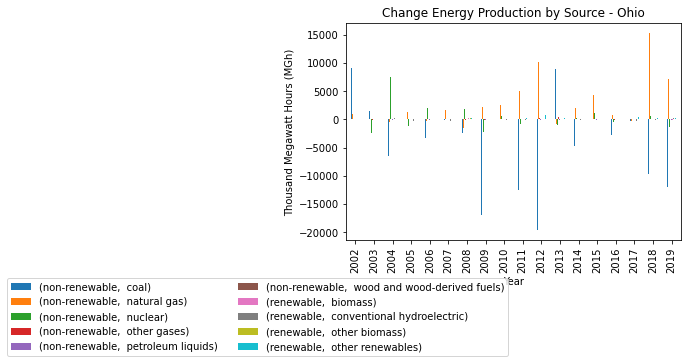

In [57]:
#create a plot showing the change in energy production by source over time for Ohio
OH_delta.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thousand Megawatt Hours (MGh)")
plt.title("Change Energy Production by Source - Ohio")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [21]:
#breakout the data from the East North Central Region into it's own dataframe
ENC_df=filtered_df2.loc[filtered_df2["Location"]=="East North Central"]

ENC_df=ENC_df.drop(columns=["source key", "units", "Location"])

ENC_df=ENC_df.set_index(["Energy_Source"])
ENC_df=ENC_df.dropna()
ENC_df

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
Energy_Source,,,,,,,,,,,,,,,,,,,,
coal,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059,non-renewable
petroleum liquids,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466,non-renewable
petroleum coke,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439,non-renewable
natural gas,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887,non-renewable
other gases,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327,non-renewable
nuclear,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686,non-renewable
conventional hydroelectric,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948,renewable
other renewables,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668,renewable
wind,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313,renewable


In [28]:
#refine the ENC dataframe so the annual data are the data rows
ENC_source=ENC_df.drop(columns="Renewable")
ENC_source=ENC_source.astype(int)
ENC_source=ENC_source.T

In [32]:
#create a summary table for ENC energy production by source
ENC_sum=ENC_source.agg(["mean", "std", "min", "max"])

ENC_sourcequant=ENC_source.quantile([.25, .5, .75])
ENC_source_sum=ENC_source_sum.append(ENC_sourcequant)
ENC_source_sum

Energy_Source,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other
mean,380593.789474,1092.263158,1769.473684,56937.368421,1023.684211,152843.421053,4363.210526,14769.263158,11159.736842,3457.684211,1261.947368,2195.789474,-892.368421,265.894737
std,77760.754904,753.108804,797.806881,40693.965690,860.018156,4679.973852,491.353525,11569.739356,10941.891665,506.185742,130.523933,433.246476,189.811957,138.812781
min,218059.000000,466.000000,258.000000,20720.000000,129.000000,143377.000000,3549.000000,2799.000000,47.000000,2723.000000,1064.000000,1473.000000,-1129.000000,84.000000
max,459078.000000,2923.000000,2974.000000,153887.000000,2327.000000,158686.000000,5216.000000,34668.000000,30313.000000,4204.000000,1546.000000,2686.000000,-481.000000,660.000000
0.25,326193.500000,561.000000,1513.500000,25425.500000,384.500000,150652.500000,4041.500000,3233.500000,311.000000,2955.500000,1163.500000,1745.000000,-1037.500000,215.500000
0.5,412245.000000,752.000000,1719.000000,35231.000000,563.000000,154835.000000,4268.000000,12441.000000,8847.000000,3567.000000,1250.000000,2298.000000,-916.000000,257.000000
0.75,447129.000000,1382.000000,2131.000000,82396.500000,1927.500000,156112.500000,4752.000000,25785.500000,21487.500000,3879.000000,1277.500000,2570.500000,-726.500000,294.500000


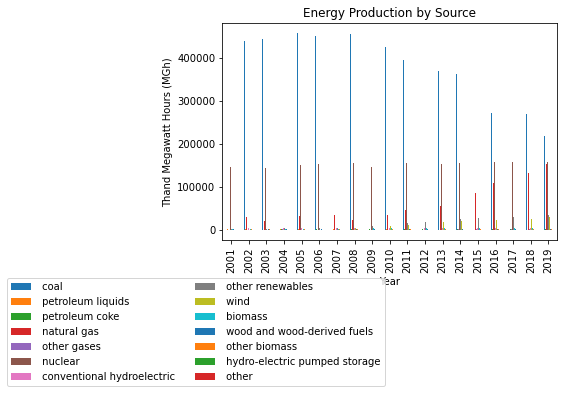

In [37]:
ENC_source.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thand Megawatt Hours (MGh)")
plt.title("Energy Production by Source")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [26]:
ENC_RE=ENC_df.groupby("")
ENC_RE.head()

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
Energy_Source,,,,,,,,,,,,,,,,,,,,
coal,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059,non-renewable
petroleum liquids,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466,non-renewable
petroleum coke,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439,non-renewable
natural gas,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887,non-renewable
other gases,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327,non-renewable
conventional hydroelectric,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948,renewable
other renewables,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668,renewable
wind,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313,renewable
biomass,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662,renewable


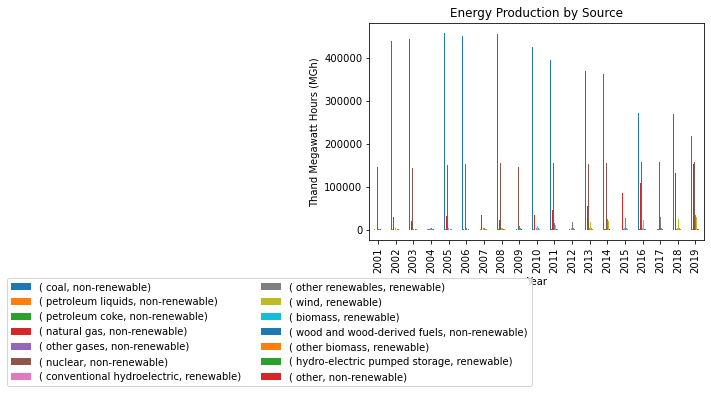

In [95]:
ENC_dfT=ENC_df.T
ENC_dfT.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thand Megawatt Hours (MGh)")
plt.title("Energy Production by Source")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [98]:
ENC_dfT.sort_index()

Energy_Source,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other
Renewable,non-renewable,non-renewable,non-renewable,non-renewable,non-renewable,non-renewable,renewable,renewable,renewable,renewable,non-renewable,renewable,renewable,non-renewable
3,,,,,,,,,,,,,,
2001,424791,2923,258,20992,129,146040,4658,2894,73,2821,1165,1656,-1127,341
2002,439095,1894,443,30578,171,145261,4966,2799,47,2753,1064,1688,-1036,660
2003,445150,2656,366,20720,136,143377,4037,2995,118,2877,1130,1747,-1017,477
2004,449108,1957,1816,22318,830,150447,4617,3083,184,2899,1250,1649,-1113,379
2005,459078,1620,1654,31749,563,150858,4046,2972,249,2723,1250,1473,-1106,293
2006,451510,927,1643,25712,499,152301,4258,3384,373,3012,1269,1743,-1039,261
2007,456905,1144,1541,33643,464,155920,3594,3812,791,3021,1239,1783,-1129,248
2008,456001,926,1719,23552,383,156305,3753,6618,3219,3399,1238,2161,-916,257


In [42]:
#temp_df=ENC_df.drop(columns=["source key", "units", "Location", "Energy_Source", "Renewable"])
#temp_df

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
307,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059
308,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466
309,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439
310,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887
311,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327
312,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686
313,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948
314,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668
315,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313
320,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662


In [43]:
#temp_df=temp_df.rename_axis(None, axis=1)


In [44]:
#temp_df.reset_index(drop=True)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059
1,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466
2,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439
3,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887
4,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327
5,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686
6,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948
7,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668
8,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313
9,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662


In [47]:
#temp_df=temp_df.astype(int)

In [51]:
#temp_df.dtypes

In [50]:
ENC_delt=temp_df.diff(axis=1)

In [54]:
ENC_delt["Energy Source"]=ENC_df["Energy_Source"]
ENC_delt

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy Source
307,NaN,14304.0,6055.0,3958.0,9970.0,-7568.0,5395.0,-904.0,-43756.0,13408.0,-31060.0,-53204.0,27465.0,-7013.0,-50843.0,-38679.0,2182.0,-5309.0,-51133.0,coal
308,NaN,-1029.0,762.0,-699.0,-337.0,-693.0,217.0,-218.0,-194.0,20.0,8.0,-154.0,-25.0,140.0,-180.0,-18.0,-24.0,26.0,-59.0,petroleum liquids
309,NaN,185.0,-77.0,1450.0,-162.0,-11.0,-102.0,178.0,-233.0,109.0,1037.0,-652.0,922.0,72.0,-66.0,-818.0,-88.0,170.0,-733.0,petroleum coke
310,NaN,9586.0,-9858.0,1598.0,9431.0,-6037.0,7931.0,-10091.0,1587.0,10092.0,10183.0,33767.0,-23819.0,1304.0,28946.0,22241.0,-10821.0,34137.0,22718.0,natural gas
311,NaN,42.0,-35.0,694.0,-267.0,-64.0,-35.0,-81.0,-164.0,186.0,-19.0,287.0,1051.0,148.0,111.0,200.0,92.0,-47.0,99.0,other gases
312,NaN,-779.0,-1884.0,7070.0,411.0,1443.0,3619.0,385.0,-11091.0,9686.0,262.0,646.0,-1959.0,986.0,-834.0,3127.0,-219.0,115.0,1662.0,nuclear
313,NaN,308.0,-929.0,580.0,-571.0,212.0,-664.0,159.0,43.0,404.0,54.0,-705.0,719.0,596.0,-256.0,608.0,-370.0,-423.0,525.0,conventional hydroelectric
314,NaN,-95.0,196.0,88.0,-111.0,412.0,428.0,2806.0,2380.0,3443.0,2803.0,3360.0,4263.0,1712.0,2413.0,55.0,3056.0,413.0,4152.0,other renewables
315,NaN,-26.0,71.0,66.0,65.0,124.0,418.0,2428.0,2370.0,3258.0,2491.0,3260.0,3982.0,1591.0,2633.0,148.0,2753.0,379.0,4229.0,wind
320,NaN,-68.0,124.0,22.0,-176.0,289.0,9.0,378.0,10.0,158.0,309.0,62.0,224.0,42.0,-275.0,-181.0,134.0,-68.0,-152.0,biomass


In [70]:
ENC_delt=ENC_delt.set_index("Energy Source")

In [71]:
ENC_delta=ENC_delt.T

In [72]:
ENC_delta

Energy Source,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,14304.0,-1029.0,185.0,9586.0,42.0,-779.0,308.0,-95.0,-26.0,-68.0,-101.0,32.0,91.0,319.0
2003,6055.0,762.0,-77.0,-9858.0,-35.0,-1884.0,-929.0,196.0,71.0,124.0,66.0,59.0,19.0,-183.0
2004,3958.0,-699.0,1450.0,1598.0,694.0,7070.0,580.0,88.0,66.0,22.0,120.0,-98.0,-96.0,-98.0
2005,9970.0,-337.0,-162.0,9431.0,-267.0,411.0,-571.0,-111.0,65.0,-176.0,0.0,-176.0,7.0,-86.0
2006,-7568.0,-693.0,-11.0,-6037.0,-64.0,1443.0,212.0,412.0,124.0,289.0,19.0,270.0,67.0,-32.0
2007,5395.0,217.0,-102.0,7931.0,-35.0,3619.0,-664.0,428.0,418.0,9.0,-30.0,40.0,-90.0,-13.0
2008,-904.0,-218.0,178.0,-10091.0,-81.0,385.0,159.0,2806.0,2428.0,378.0,-1.0,378.0,213.0,9.0
2009,-43756.0,-194.0,-233.0,1587.0,-164.0,-11091.0,43.0,2380.0,2370.0,10.0,-127.0,137.0,59.0,-8.0
2010,13408.0,20.0,109.0,10092.0,186.0,9686.0,404.0,3443.0,3258.0,158.0,175.0,-17.0,-166.0,-21.0


<AxesSubplot:>

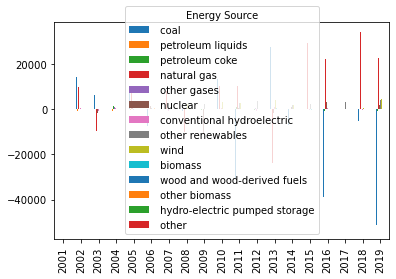

In [74]:
ENC_delta.plot(kind="bar")

In [63]:
#ENCcolumns=ENC_delt.columns
#ENCcolumns.values

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Energy Source'], dtype=object)

In [ ]:
ENC2001

In [66]:
ENC_delt.plot(kind="bar", x=ENC_delt["2001"], y=ENC_delt["Energy Source"])

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              nan],\n             dtype='float64')] are in the [columns]"

In [17]:
ENC_df.diff(axis=1) #create a new dataframe for delta

TypeError: unsupported operand type(s) for -: 'NoneType' and 'str'